<a href="https://colab.research.google.com/github/modcomlearning/learning/blob/master/Classification_Cakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Delicacy Recipe**
Scones? Muffin? or Cupcake?
Hi, this time we tried an interesting project: Delicacy.

This will end up with a model that will automatically predict whether a given recipe is a muffin recipe or a cupcake recipe.
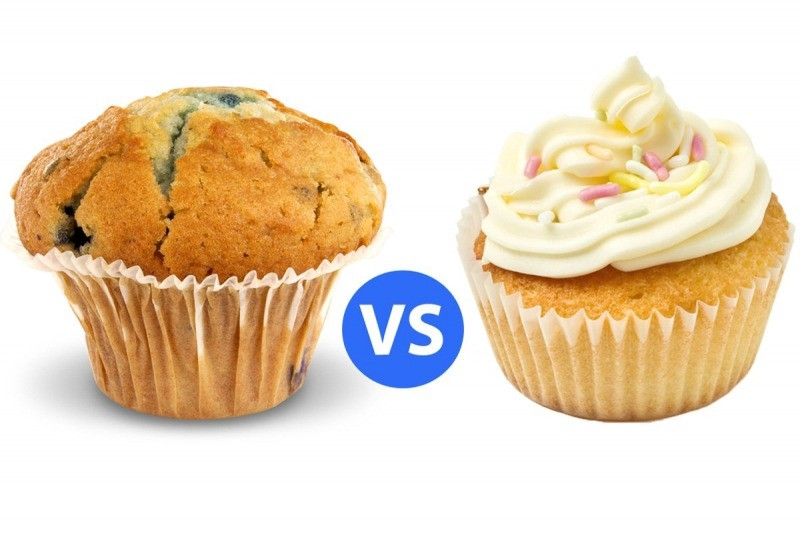

Although the cupcake is usually decorated, the shape and appearance are very similar. But the real difference is in the preparation technique.
Cupcake is a cup-sized cake. The cupcake recipe uses techniques for preparing the cake dough. And the muffin is considered a quick roll.

In Machine Learning these principles apply:

**Step 1# Gathering Data**

Alice Zhao did a research and found data by googling ‘basic muffin recipe’ and ‘basic cupcake recipe’.

She found, surprisingly, that muffins and cupcakes just have eight ingredients in them.

At end of the day this is what the data looks like:

In [30]:
import pandas
data = pandas.read_csv("data.csv")
data
 

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt,Type
0,55,28,3,7,5,2,0,0,Muffin
1,47,24,12,6,9,1,0,0,Muffin
2,47,23,18,6,4,1,0,0,Muffin
3,45,11,17,17,8,1,0,0,Muffin
4,50,25,12,6,5,2,1,0,Muffin
5,55,27,3,7,5,2,1,0,Muffin
6,54,27,7,5,5,2,0,0,Muffin
7,47,26,10,10,4,1,0,0,Muffin
8,50,17,17,8,6,1,0,0,Muffin
9,50,17,17,11,4,1,0,0,Muffin


**Step 2# Preparing The Data**

Is the process of transforming and understanding raw data so that data scientists and analysts can run it through machine learning algorithms to uncover insights or make predictions;

Below we find general statistics, below we see that the highest - max sugar level was 52, the least- min number of  Eggs were 0, etc..etc


In [31]:
data.describe()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,39.340000,15.920000,23.080000,9.740000,6.940000,2.680000,0.960000,0.960000
std,11.213348,8.090912,14.037617,4.898188,3.644453,3.152194,2.732719,1.989359
min,19.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,11.000000,16.000000,6.000000,5.000000,1.000000,0.000000,0.000000
50%,39.000000,17.000000,20.000000,8.000000,6.000000,1.000000,0.000000,0.000000
75%,47.750000,23.000000,26.000000,12.000000,9.000000,2.000000,1.000000,0.000000
max,55.000000,28.000000,52.000000,20.000000,14.000000,11.000000,14.000000,6.000000


**Step 3# Spliting Data**

This is a process involves splitting data to to features and outcome, in this case  features are **Flour	Milk	Sugar	Butter	Egg	Baking Powder	Vanilla	Salt**  and outcome is **Type Column**
Refer from the dataset in th first cell

In [32]:
# Split to X, Y
array = data.values
X = array[:, 0: 8]    # Flour Milk Sugar Butter Egg Baking Powder Vanilla Salt 1
Y = array[:, 8]  # Type

**Step 4# Spliting Data**

In this step we split data into Training Set - 70%  and Testing Set - 30%

In [33]:

from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,
                                                                    test_size=0.30,
                                                                    random_state=42)

**Step 5# Choosing a Model**

This is a process that can be applied both across different types of models (e.g. logistic regression, SVM, KNN, gausian etc.);

After Choosing a Model Fit the Training data in it and hide the Testing data

In [34]:
# Load classicaftion models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

**Step 6# Test Model For Accuracy**

In this Step we test the model to check the accuracy, we use the 30% data. Please Note this data was not fitted in training the model

In [35]:

predictions = model.predict(X_test)
print('Model Predicted ', predictions)
print('Expected ', Y_test)

Model Predicted  ['Cupcake' 'Cupcake' 'Muffin' 'Scone' 'Cupcake' 'Scone' 'Muffin' 'Muffin'
 'Muffin' 'Cupcake' 'Cupcake' 'Muffin' 'Cupcake' 'Muffin' 'Muffin']
Expected  ['Cupcake' 'Cupcake' 'Muffin' 'Scone' 'Cupcake' 'Scone' 'Muffin' 'Muffin'
 'Muffin' 'Cupcake' 'Cupcake' 'Muffin' 'Cupcake' 'Muffin' 'Muffin']


**Step 7# Get Model Accuracy**

Here we check the modle accuracy

In [36]:

from sklearn.metrics import accuracy_score
print ('Accuracy ', accuracy_score(Y_test, predictions))
 
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))
 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions))

Accuracy  1.0
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         6
      Muffin       1.00      1.00      1.00         7
       Scone       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[6 0 0]
 [0 7 0]
 [0 0 2]]


**Step 8# use the model to check what cake you are cooking**

Here we only provide the modle with ingradients and it predicts the cake 

In [37]:
flower = [[19,	5,	25,	5,	0	,10	,0, 5	]]
outcome = model.predict(flower)
print('You will be cooking a ', outcome)

You will be cooking a  ['Scone']


And the Model does it, we are preparing a scone, Can't wait.

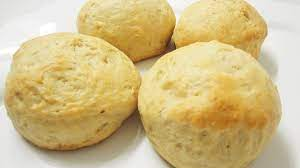